       Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc   ast_sinI  \
0         1  0.117943 -0.139275  0.116495   0.167671  0.115350   0.167737   
1         2  0.287661 -0.155906  0.287509   0.545540  0.280881   0.547176   
2         3  0.235817  0.249061  0.235743   0.229127  0.233766   0.229454   
3         4  0.102952  0.112204  0.102790   0.031819  0.099826   0.111464   
4         5  0.189125 -0.432469  0.105354   0.073081  0.185096   0.079498   
...     ...       ...       ...       ...        ...       ...        ...   
1994  33600  0.126320  0.048541  0.126282   0.108826  4.000000   0.000000   
1995  33630  0.102628  0.149816  0.102606   0.114322  4.000000   0.000000   
1996  33661  0.108461  0.330204  0.108445   0.127502  4.000000   0.000000   
1997  33677  0.117976  0.150319  0.117709   0.114099  4.000000  48.120000   
1998  33684  0.109115  0.083795  0.109104   0.110425  4.000000   0.000000   

      calc_sma  
0     2.763434  
1     2.766876  
2     2.665844  
3     2

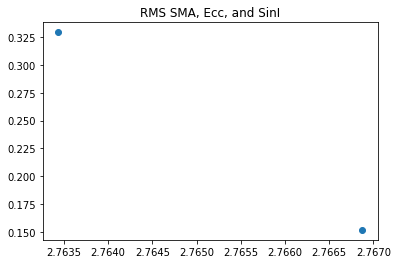

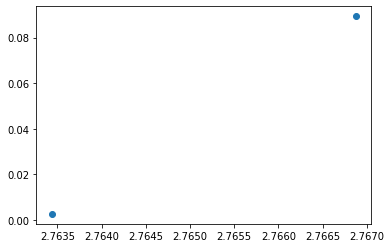

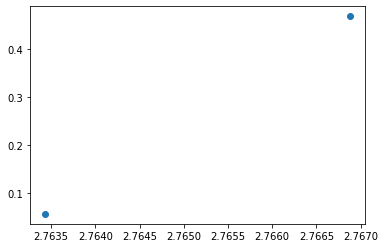

Empty DataFrame
Columns: [rms_sma, rms_ecc, rms_sinI, rms_sini]
Index: []
Empty DataFrame
Columns: [Name, obs_ecc, obs_sinI, calc_ecc, calc_sinI, ast_ecc, ast_sinI, calc_sma]
Index: [] None
Empty DataFrame
Columns: [Name, obs_ecc, obs_sinI, calc_ecc, calc_sinI, ast_ecc, ast_sinI, calc_sma]
Index: []
    rms_sma   rms_ecc rms_sinI  rms_sini
1  0.151803  0.089334      NaN  0.469279
   Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  calc_sma
1     2  0.287661 -0.155906  0.287509    0.54554  0.280881  0.547176  2.766876 None
   Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  calc_sma
1    53  0.192589 -0.439483  0.191477   0.053963  0.219447  0.080099  2.615322


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfs = []

og_df = pd.read_csv('prop_elem_AstFam_families_multi_sec_hires.csv',index_col=0)
print(og_df)
for i in range(9):
    df = pd.read_csv('prop_elem_AstFam_families_'+str(i)+'_'+str(i+2)+'.csv',index_col=0)
    
    if i == 1:
        df1 = pd.read_csv('prop_elem_AstFam_families_'+str(i)+'_'+str(i+2)+'.csv',index_col=0)
    #print(df)
    resid_dfs = pd.DataFrame(columns=['dsma','decc','dsini'])
    resid_dfs['dsma'] = og_df['calc_sma'] - df['calc_sma']
    resid_dfs['decc'] = og_df['calc_ecc'] - df['calc_ecc']
    resid_dfs['dsini'] = og_df['calc_sinI'] - df['calc_sinI']
    dfs.append(resid_dfs)

    
rms = pd.DataFrame(columns=['rms_sma','rms_ecc','rms_sinI'])
sum_sma = 0
sum_ecc = 0
sum_sini = 0
for i in range(9):
    sum_sma = sum_sma + dfs[i]['dsma']**2
    sum_ecc = sum_ecc + dfs[i]['decc']**2
    sum_sini = sum_sini + dfs[i]['dsini']**2

rms['rms_sma'] = np.sqrt(sum_sma/9)
rms['rms_ecc'] = np.sqrt(sum_ecc/9)
rms['rms_sini'] = np.sqrt(sum_sini/9)

plt.scatter(og_df['calc_sma'],rms['rms_sma'])
plt.title('RMS SMA, Ecc, and SinI')
plt.show()
plt.scatter(og_df['calc_sma'],rms['rms_ecc'])
plt.show()
plt.scatter(og_df['calc_sma'],rms['rms_sini'])
plt.show()

ind = np.where(rms['rms_ecc'] > 0.15)[0]
print(og_df.iloc[ind],print(rms.iloc[ind]))
print(df1.iloc[ind])

ind = np.where(rms['rms_sini'] > 0.2)[0]
print(og_df.iloc[ind],print(rms.iloc[ind]))
print(df1.iloc[ind])

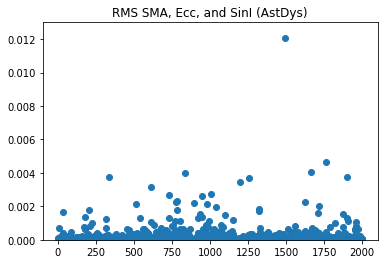

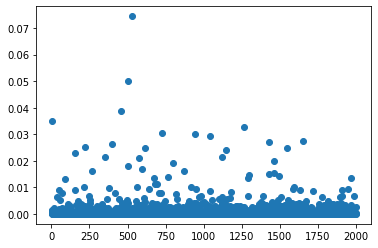

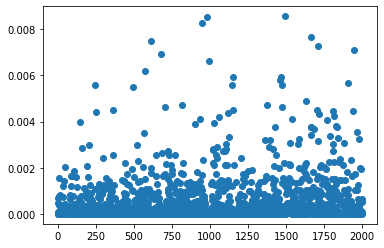

In [85]:
astfam_sig = pd.read_csv('AstFam_sig.txt')
plt.scatter(astfam_sig['Name'],astfam_sig['a(AU)'])
plt.title('RMS SMA, Ecc, and SinI (AstDys)')
plt.ylim(0,0.013)
plt.show()
plt.scatter(astfam_sig['Name'],astfam_sig['e'])
plt.show()
plt.scatter(astfam_sig['Name'],astfam_sig['sinI'])
plt.show()

In [40]:
print(np.median(rms['rms_sma']),np.median(rms['rms_ecc']),np.median(rms['rms_sini']))
print(np.median(astfam_sig['a(AU)']),np.median(astfam_sig['e']),np.median(astfam_sig['sinI']))

2.056479132926774e-05 0.006008461689892976 0.0011657431722953981
6.6e-06 0.00021690000000000001 8.510000000000001e-05


In [42]:
print(np.mean(rms['rms_sma']),np.mean(rms['rms_ecc']),np.mean(rms['rms_sini']))
print(np.mean(astfam_sig['a(AU)']),np.mean(astfam_sig['e']),np.mean(astfam_sig['sinI']))

print(len(rms),len(astfam_sig))

0.00011355088697347155 0.02193906193305358 0.01907212258825798
0.0001612009906152242 0.001194494786235662 0.00047746955161626694
1999 1918


In [81]:
ind = np.where(rms['rms_ecc'] > 0.1)[0]
print(len(ind))
print(df1.iloc[ind])

38
     Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  \
52     53  0.192589 -0.439483  0.014924   0.079142  0.219447  0.080099   
108   109  0.266524  0.245809  0.143991   0.146440  0.264292  0.149761   
137   139  0.226990 -0.375550  0.063300   0.177423  0.224289  0.184476   
154   156  0.259547 -0.313483  0.041350   0.161279  0.281983  0.181293   
185   187  0.290124 -0.188081  0.051579   0.125307  0.288262  0.172416   
202   204  0.178303  0.244288  0.017456   0.150500  0.167077  0.151402   
214   216  0.230671  0.097552  0.058842   0.218506  0.225966  0.220981   
228   231  0.171957 -0.138650  0.022918   0.099496  0.169598  0.101100   
231   234  0.176348  0.349671  0.022813   0.239472  0.173508  0.240876   
246   249  0.182969 -0.259358  0.011964   0.172814  0.178783  0.173861   
250   253  0.230576  0.154688  0.022472   0.113297  0.220846  0.113377   
266   269  0.236963 -0.283537  0.023630   0.093475  0.264946  0.092919   
280   284  0.196550  0.126658  0.04

In [ ]:
print(rms.iloc[ind])

In [83]:
print(dfs[ind])

TypeError: only integer scalar arrays can be converted to a scalar index